# Assignment 2
Look for any information about gene 'PGM1' (encoding Phosphoglucomutase 1) in the NCBI database 'gene' and print the output. Mutations in this gene cause glycogen storage disease. PGM1 is an evolutionarily conserved enzyme that regulates one of the most important metabolic carbohydrate trafficking points in prokaryotic and eukaryotic organisms.

Deficiency is an inherited metabolic disorder in humans (cause of Congenital disorder of glycosylation). Affected patients show multiple disease phenotypes, including dilated cardiomyopathy, exercise intolerance, and hepatopathy, reflecting the central role of the enzyme in glucose metabolism

## Libraries

In [1]:
from Bio import Entrez
from pprint import pprint
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from tqdm.notebook import tqdm


Bad key "text.kerning_factor" on line 4 in
/Users/villons/opt/anaconda3/envs/biosciences/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Functions

In [5]:
Entrez.email = "giacomo.villa.mi@gmail.com"
starting_path = os.getcwd()
plt.style.use('seaborn')

def info():
    handle = Entrez.einfo()
    result = Entrez.read(handle)
    dbs = result['DbList']
    print("Avaible database:")
    for db in dbs:
        print(db.capitalize(), end = ", ")
    print()
    print("FOR REASEARCH ALL LOWERCASE!")

def db_info(db):
    handle = Entrez.einfo(db = db)
    record = Entrez.read(handle)
    print(pprint(record['DbInfo']))
        
def good_print(text):
    print(pprint(text))
        
def esearch(db, query, num_max = 20):
    handle = Entrez.esearch(db = db, term = query, retmax = num_max)
    record = Entrez.read(handle, validate = True)
    return record

def esummary(db, id_val):
    handle = Entrez.esummary(db = db, id = id_val)
    record = Entrez.read(handle, validate = True)
    return record

def efetch(db, id_val, retmode = 'xml'):
    handle = Entrez.efetch(db  = db, id = id_val, retmode = retmode)
    record = Entrez.read(handle, validate = True)
    return record

def get_idList(record):
    return record['IdList']

def save_img(title):    
    plt.savefig('./images/analysis_images/'+title+'.png', dpi = 300, quality = 95, format = 'png', pad_inches = 500)

def plot_num_file_for_species(ids):
    
    species = dict()
    position = 0

    for file_id in tqdm(ids, desc = 'Gene files processed'):
        summary = esummary('gene', file_id)
        specie = summary['DocumentSummarySet']['DocumentSummary'][0]['Organism']['ScientificName']
        specie = specie.lower()
        if specie in species:
            species[specie] += 1
        else:
            species[specie] = 1
    
    ordered = {k: v for k, v in sorted(species.items(), key=lambda item: item[1])}
    species_name = list()
    values = list()
    for info in list(ordered)[len(ordered)-10:len(ordered)]:
        species_name.append(info)
        values.append(ordered[info])
        
    fig, ax = plt.subplots()
    
    ax.barh(species_name, values)
    
    for i, v in enumerate(values):
        ax.text(v, i - .05, str(v), color='black', fontweight='bold', ha='left')
        
    ax.set_xlabel('Number of Gene file')
    plt.title('Comparison of Gene file number about PGM1 gene')

    ax.grid(True)
    plt.subplots_adjust(left=0.25)
    save_img('number_of_gene_file')
    plt.show()   
    
def word_cloud(words):
    
    papers_mask = np.array(Image.open("./images/papers.png"))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", 
                          mode="RGBA", max_words=2000, mask = papers_mask).generate(words)

    image_colors = ImageColorGenerator(papers_mask)
    
    return wordcloud, image_colors

def plot_papers_title(ids):
    titles = list()
    for paper_id in tqdm(ids, desc = 'Papers processed'):
        summary = esummary('pubmed', paper_id)
        titles.append(summary[0]['Title'])
        
    wordcloud, colors = word_cloud(' '.join(titles))
    fig, ax = plt.subplots(figsize=[20,20])
    plt.title('Word Cloud about PGM1 title papers')
    ax.axis("off")
    
    
    ax.imshow(wordcloud.recolor(color_func=colors), interpolation="bilinear")
    wordcloud.to_file("./images/analysis_images/title_word_cloud.png")

    plt.show()
    
def plot_abstract(ids):
    abstracts = list()
    for paper_id in tqdm(ids, desc = 'Papers processed'):
        fetch = efetch('pubmed', paper_id)
        try:
            abstracts.append(fetch['PubmedArticle'][0]['MedlineCitation']['Article']['Abstract']['AbstractText'][0])
        except: 
            print(paper_id)
        
    wordcloud, colors = word_cloud(' '.join(abstracts))
    fig, ax = plt.subplots(figsize=[20,20])
    plt.title('Word Cloud about PGM1 papers abstracts')
    ax.axis("off")
    
    
    ax.imshow(wordcloud.recolor(color_func=colors), interpolation="bilinear")
    wordcloud.to_file("./images/analysis_images/abstract_word_cloud.png")

    plt.show()
    

## Main

### Print some useful info

In [ ]:
info()
db_info('gene')

### Query and IDs for analysis

In [3]:
ids_gene = esearch('gene', 'PGM1 AND phosphoglucomutase 1[Description]', 1000)
ids_gene = get_idList(ids_gene)

ids_pub = esearch('pubmed', 'PGM1', 1000)
ids_pub = get_idList(ids_pub)

### Research

DONE:  100
DONE:  200
DONE:  300
DONE:  400
DONE:  500
DONE:  600
DONE:  700
DONE:  800
DONE:  900


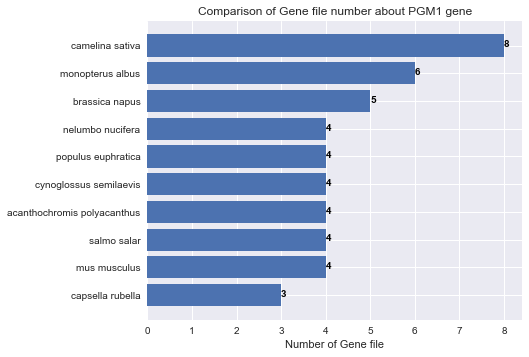

In [78]:
plot_num_file_for_species(ids_gene)

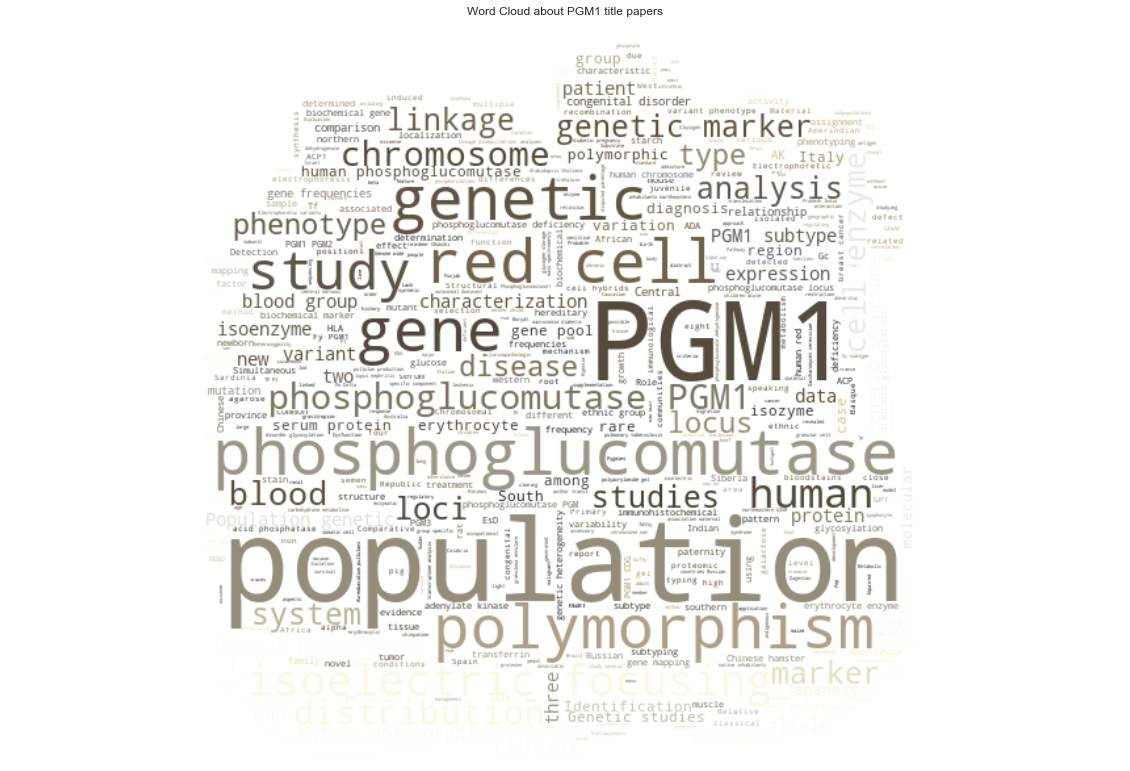

In [58]:
plot_papers_title(ids_pub)

20301507
26043514
25288126
23302343
15658455
10443001
10407655
8863716
8103301
1363877
2151430
2535589
2535588
2972272
2961967
2945546
3159921
2980957
6241947
6240519
6235323
6236797
6234415
6223986
6858304
7183165
6219660
6218068
6211126
6455014
6460320
6257609
508048
447144
738731
745303
110524
975900
828863
1189622
1176149
1192828
812569
4829444
4363865
4358963
4763928
4201296
4704959
5053799
4679618
4995100
5549470
5545039
5493845
5449952
5489886
4099123
5366295



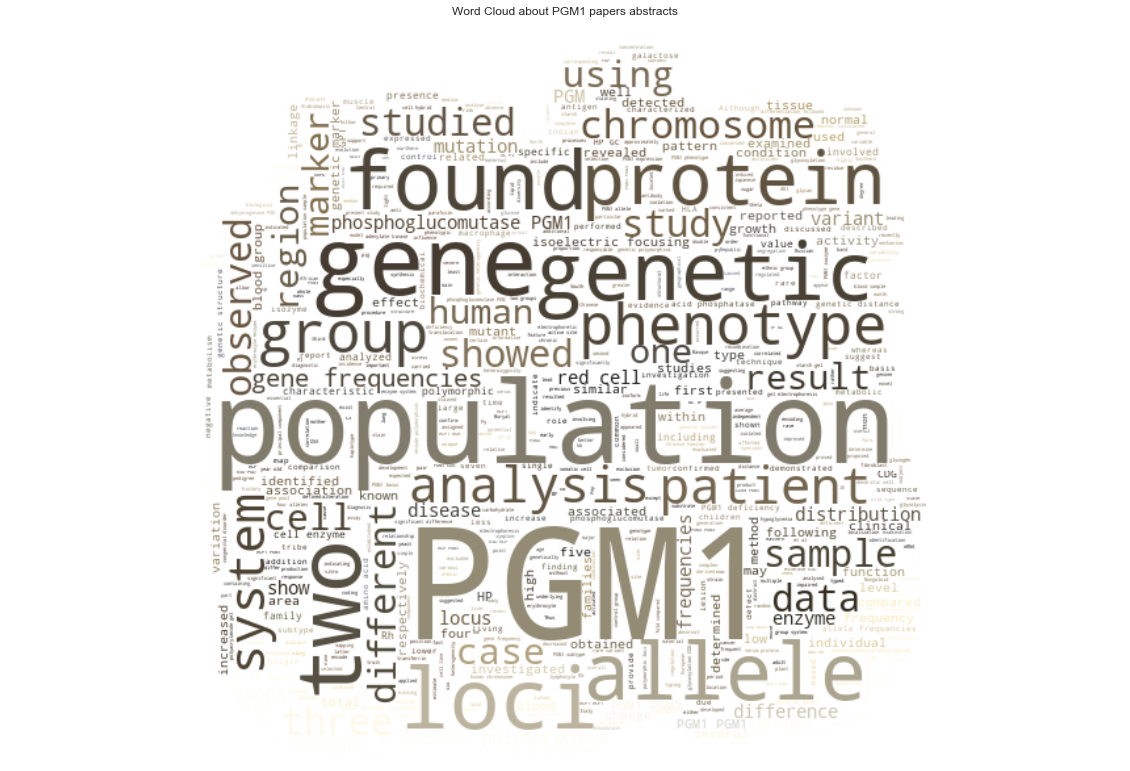

In [12]:
plot_abstract(ids_pub)

## Analysis

Interesting fields: 
* On Entrez.fetch GENE
    * Entrezgene_track-info
* Analysis on pubmed about this gene
    * wordcloud on abstract ['PubmedArticle'][0]['MedlineCitation']['Article']['Abstract']['AbstractText'][0]
    * Language (probably all eng)
    * Year ['PubmedArticle'][0]['PubmedData']['History'][0]
    * Country ['PubmedArticle'][0]['MedlineCitation']['MedlineJournalInfo']
* Analysis on tax 

In [64]:
32221390

32221390

In [67]:
good_print(efetch('pubmed', 32221390))

{'PubmedArticle': [{'MedlineCitation': {'Article': {'Abstract': {'AbstractText': ['Human phosphoglucomutase 1 (PGM1) is an evolutionary conserved enzyme that belongs to the ubiquitous and ancient α-D-phosphohexomutases, a large enzyme superfamily with members in all three domains of life. PGM1 catalyzes the bi-directional interconversion between α-D-glucose 1-phosphate (G1P) and α-D-glucose 6-phosphate (G6P), a reaction that is essential for normal carbohydrate metabolism and also important in the cytoplasmic biosynthesis of nucleotide sugars needed for glycan biosynthesis. Clinical studies have shown that mutations in the PGM1 gene may cause PGM1 deficiency, an inborn error of metabolism previously classified as a glycogen storage disease, and PGM1 deficiency was recently also shown to be a congenital disorder of glycosylation. Here we present three crystal structures of the isoform 2 variant of PGM1, both as a free enzyme and in complex with its substrate and product. The structures 